In [ ]:
import pandas as pd
import seaborn as sns
import datetime as dt

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import os

In [ ]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep=',')

In [ ]:
df

In [ ]:
df.dropna(inplace=True)

In [ ]:
'''
Variable Name	Описание	Единицы	Тип
age	возраст пациента	лет	Целое число
anaemia	снижение эритроцитов или гемоглобина		Двоичный
creatinine_phosphokinase	уровень фермента КФК в крови	мкг/л	Целое число
diabetes	если у пациента диабет		Двоичный
ejection_fraction	процент крови, покидающей сердце при каждом сокращении	%	Целое число
high_blood_pressure	если у пациента гипертония		Двоичный
platelets	тромбоциты в крови	килотромбоцитов/мл	Непрерывный
serum_creatinine	уровень сывороточного креатинина в крови	мг/дл	Непрерывный
serum_sodium	уровень сывороточного натрия в крови	мэкв/л	Целое число
sex	женщина или мужчина		Двоичный
smoking	курит ли пациент или нет		Двоичный
time	период наблюдения	дни	Целое число

death_event	если пациент умер в течение периода наблюдения		Двоичный
'''

In [ ]:
df['anaemia'].value_counts()

In [ ]:
df['sex'].value_counts()

In [ ]:
df['diabetes'].value_counts()

In [ ]:
df['high_blood_pressure'].value_counts()

In [ ]:
df['smoking'].value_counts()

In [ ]:
df['DEATH_EVENT'].value_counts()

Выводы: у 58% пациентов нет снижения эритроцитов или гемоглобина. Мужчин больше, чем женщин. Диабетиков больше (примерно 55%) от всех пациентов. Некурящих почти в 2 раза больше, чем курящих. Количество умерших пациентов совпадает с числом курящих (96), а количество живых с числом некурящих (203). Пациентов без гипертонии больше

In [ ]:
death = df.groupby('DEATH_EVENT').agg({'age':['mean']})
death

In [ ]:
diabets = df.groupby('diabetes').agg({'age':['mean']})
diabets

In [ ]:
anemia = df.groupby('anaemia').agg({'age':['mean']})
anemia

In [ ]:
df['age'].mean()

In [ ]:
cols = ['age','creatinine_phosphokinase','ejection_fraction',	'platelets',	'serum_creatinine',	'serum_sodium','time']
for i in cols:
    plt.figure()
    sns.boxplot(x=i, data=df)
    plt.show()

Возраст пациентов от 60 до 70 лет

In [ ]:
df.info()

In [ ]:
df = df.query("serum_creatinine <= 5")

In [ ]:
df = df.query("creatinine_phosphokinase <= 3000")

In [ ]:
cols = ['age','creatinine_phosphokinase','ejection_fraction',	'platelets',	'serum_creatinine',	'serum_sodium','time']
for i in cols:
    plt.figure()
    sns.boxplot(x=i, data=df)
    plt.show()

In [ ]:
df.columns

In [ ]:
# корреляционный анализ

In [82]:
df.corr() # коэффициенты линейной корреляции могут принимать значения от -1 до +1 
# (-1 сильная обратная линейная зависимость, +1 сильная прямая линейная зависимость, 
# значения возле 0 - отсутствие линейной зависимости, нелинейная зависимость может быть при этом!)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [83]:
df.corr()['DEATH_EVENT']

age                         0.253729
anaemia                     0.066270
creatinine_phosphokinase    0.062728
diabetes                   -0.001943
ejection_fraction          -0.268603
high_blood_pressure         0.079351
platelets                  -0.049139
serum_creatinine            0.294278
serum_sodium               -0.195204
sex                        -0.004316
smoking                    -0.012623
time                       -0.526964
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

In [84]:
df['sex'].value_counts()

sex
1    194
0    105
Name: count, dtype: int64

In [85]:
df['smoking'].value_counts()

smoking
0    203
1     96
Name: count, dtype: int64

In [86]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

In [87]:
df_corr = df.corr()
for col in df_corr.columns:
    df_corr[col+'_s'] = round(df_corr[col], 4).astype('str')
    df_corr.loc[abs(df_corr[col])<0.075, col+'_s'] = ' '
    df_corr.drop(col, axis=1, inplace=True)    
df_corr.columns = list(df_corr.index)
df_corr

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.0,0.088,-0.0816,-0.101,,0.0933,,0.1592,,,,-0.2241,0.2537
anaemia,0.088,1.0,-0.1907,,,,,,,-0.0948,-0.1073,-0.1414,
creatinine_phosphokinase,-0.0816,-0.1907,1.0,,,,,,,0.0798,,,
diabetes,-0.101,,,1.0,,,0.0922,,-0.0896,-0.1577,-0.1472,,
ejection_fraction,,,,,1.0,,,,0.1759,-0.1484,,,-0.2686
high_blood_pressure,0.0933,,,,,1.0,,,,-0.1046,,-0.1964,0.0794
platelets,,,,0.0922,,,1.0,,,-0.1251,,,
serum_creatinine,0.1592,,,,,,,1.0,-0.1891,,,-0.1493,0.2943
serum_sodium,,,,-0.0896,0.1759,,,-0.1891,1.0,,,0.0876,-0.1952
sex,,-0.0948,0.0798,-0.1577,-0.1484,-0.1046,-0.1251,,,1.0,0.4459,,


In [88]:
df_corr['DEATH_EVENT']

age                          0.2537
anaemia                            
creatinine_phosphokinase           
diabetes                           
ejection_fraction           -0.2686
high_blood_pressure          0.0794
platelets                          
serum_creatinine             0.2943
serum_sodium                -0.1952
sex                                
smoking                            
time                         -0.527
DEATH_EVENT                     1.0
Name: DEATH_EVENT, dtype: object

In [90]:
'''
Variable Name	Описание	Единицы	Тип
age	возраст пациента	лет	Целое число
ejection_fraction	процент крови, покидающей сердце при каждом сокращении	%	Целое число
high_blood_pressure	если у пациента гипертония		Двоичный
serum_creatinine	уровень сывороточного креатинина в крови	мг/дл	Непрерывный
serum_sodium	уровень сывороточного натрия в крови	мэкв/л	Целое число

death_event	если пациент умер в течение периода наблюдения		Двоичный
'''

'\nVariable Name\tОписание\tЕдиницы\tТип\nage\tвозраст пациента\tлет\tЦелое число\nejection_fraction\tпроцент крови, покидающей сердце при каждом сокращении\t%\tЦелое число\nhigh_blood_pressure\tесли у пациента гипертония\t\tДвоичный\nserum_creatinine\tуровень сывороточного креатинина в крови\tмг/дл\tНепрерывный\nserum_sodium\tуровень сывороточного натрия в крови\tмэкв/л\tЦелое число\n\ndeath_event\tесли пациент умер в течение периода наблюдения\t\tДвоичный\n'

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

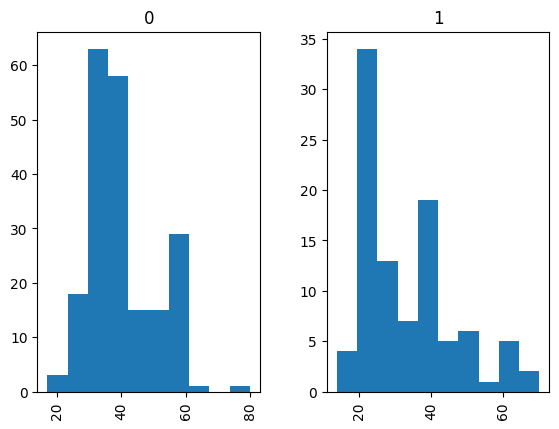

In [91]:
df.hist(column='ejection_fraction', by='DEATH_EVENT')

In [92]:
df.ejection_fraction.min(), df.ejection_fraction.max()

(14, 80)

In [93]:
list_ejection_fraction = np.linspace(df.ejection_fraction.min(), df.ejection_fraction.max(), 9)
list_ejection_fraction

array([14.  , 22.25, 30.5 , 38.75, 47.  , 55.25, 63.5 , 71.75, 80.  ])

In [94]:
df['ejection_fraction_2'] = list_ejection_fraction[0]
for i in list_ejection_fraction[1:-1]:
    # print(i)
    df.loc[df[df.apply(lambda x: x.ejection_fraction>=i, axis=1)].index, 'ejection_fraction_2'] = i
df  

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,ejection_fraction_2
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,14.00
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,30.50
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,14.00
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,14.00
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,14.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,30.50
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,30.50
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,55.25
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,30.50


In [95]:
ejection_fraction_stat = df.groupby('ejection_fraction_2').agg({'DEATH_EVENT': ['count', 'mean']})
ejection_fraction_stat.columns=['DEATH_EVENT_count', 'DEATH_EVENT_mean']
ejection_fraction_stat

,DEATH_EVENT_count,DEATH_EVENT_mean
ejection_fraction_2,,
14.00,23,0.869565
22.25,70,0.442857
30.50,89,0.247191
38.75,57,0.157895
47.00,24,0.291667
55.25,33,0.151515
63.50,2,1.000000
71.75,1,0.000000


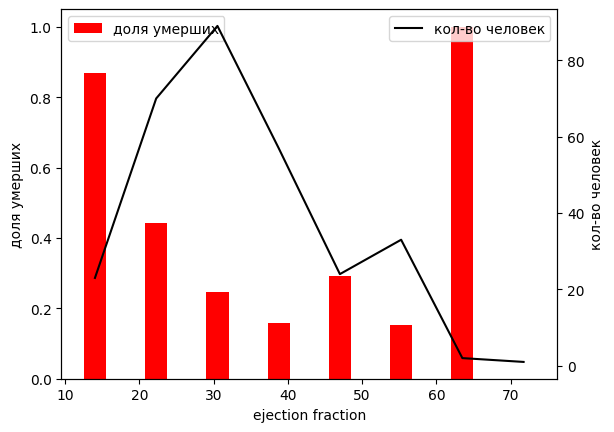

In [96]:
ax = plt.axes()
l1 = ax.bar(ejection_fraction_stat.index, ejection_fraction_stat.DEATH_EVENT_mean, width=3, color='#ff0000', label='доля умерших')
ax2 = ax.twinx()
l2 = ax2.plot(ejection_fraction_stat.index, ejection_fraction_stat.DEATH_EVENT_count, color='#000000', label='кол-во человек')

ax.legend()
ax2.legend(loc='upper right')

ax.set_xlabel('ejection fraction')
ax.set_ylabel('доля умерших')
ax2.set_ylabel('кол-во человек')

plt.show()

In [97]:
# линейная регрессия 
# (для этой задачи выходной столбец должен представлять собой вещественное число)
# использовать можно датасеты для задач регрессии или бинарной (классы 0 и 1) (не множественной) классификации 

In [98]:
# создание обучающей и тестовой выборок из исходной

In [99]:
# способ 1 - from sklearn.utils import shuffle ### df = shuffle(df)
df = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep=',')

from sklearn.utils import shuffle
df = shuffle(df) # перемешать датасет случайным образом (теперь индексы идут не по порядку)

N_obuch = round(len(df)*0.8) # число примеров в обучающей выборке (80%)
df_train = df.copy().iloc[:N_obuch, :] # в train попадут случайные N_obuch записей исходной выборки из файла
df_test = df.copy().iloc[N_obuch:, :] # в test оставшиеся записи
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
246,55.0,0,2017,0,25,0,314000.00,1.10,138,1,0,214,1
76,70.0,0,92,0,60,1,317000.00,0.80,140,0,1,74,0
81,67.0,0,582,0,50,0,263358.03,1.18,137,1,1,76,0
265,50.0,1,298,0,35,0,362000.00,0.90,140,1,1,240,0
8,65.0,0,157,0,65,0,263358.03,1.50,138,0,0,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,55.0,0,1820,0,38,0,270000.00,1.20,139,0,0,271,0
49,57.0,1,129,0,30,0,395000.00,1.00,140,0,0,42,1
214,65.0,1,135,0,35,1,290000.00,0.80,134,1,0,194,0
83,79.0,1,55,0,50,1,172000.00,1.80,133,1,0,78,0


In [100]:
# способ 2 - df.sample(N)
df = pd.read_csv('heart_failure_clinical_records_dataset.csv', sep=',')

N_obuch = round(len(df)*0.8) # число примеров в обучающей выборке (80%)
df_train = df.copy().sample(N_obuch) # в train попадут случайные N_obuch записей исходной выборки из файла
df_test = df.copy().drop(df_train.index, axis = 0) # в test оставшиеся записи
len(df), N_obuch, len(df_train), len(df_test), df_train.iloc[:, :].index, df_test.iloc[:, :].index

(299,
 239,
 239,
 60,
 Index([ 91, 157, 125,   1, 285, 236, 182,  89, 270,  40,
        ...
        177,  65, 200,  48, 172, 240,  16, 230, 197, 153],
       dtype='int64', length=239),
 Index([  0,   3,  14,  19,  21,  25,  27,  33,  36,  39,  42,  45,  47,  49,
         50,  72,  74,  76,  82,  83,  85,  93,  95,  98, 105, 107, 132, 143,
        148, 152, 155, 175, 178, 183, 189, 190, 192, 193, 195, 199, 208, 213,
        216, 224, 228, 232, 243, 248, 250, 251, 252, 254, 260, 262, 264, 267,
        269, 273, 290, 297],
       dtype='int64'))

In [101]:
# подготовка данных и нахождение коэффициентов линейной регрессии

In [102]:
x = np.array([np.array(df_train[col]) for col in df_train.columns[:-1]])
y = np.array(df_train[df_train.columns[-1]]) # DEATH_EVENT
x.shape, y.shape

((12, 239), (239,))

In [103]:
# уравнение линейной регрессии выглядит как y = k1 * x1 + k2 * x2 + k3*x3 + ... + const
free_x = np.ones(len(y)) # для нахождения const добавляем еще один параметр искусственно, заполняем массив 1
x = np.vstack((x, free_x)) # добавляем столбец справа
x.shape

(13, 239)

In [104]:
x = x.T # транспонируем матрицу
x.shape

(239, 13)

In [105]:
import scipy

In [106]:
# np.__version__

In [107]:
# scipy.__version__

In [108]:
# в терминале pip install scipy

In [109]:
from scipy.linalg import * # подключаем библиотеку Линейная алгебра
s = lstsq(x, y) # нахождение коэффициентов регрессии методом наименьших квадратов
# при ошибке вида SVD did not converge in Linear Least Squares , проверьте, м.б. в данных есть незаполненные значения (NaN)
# также ошибка м.б. вызвана проблемами в версиях библиотек numpy и scipy - тогда надо переустановить библиотеки, понизить или повысить её версию

In [110]:
s[0].shape, s[0] # коэффициенты линейной регрессии

((13,),
 array([ 4.92360899e-03, -9.48719409e-03,  3.78005624e-05, -9.76232893e-04,
        -1.03141971e-02, -8.50957168e-03, -1.10196543e-08,  8.79849117e-02,
        -8.15468802e-03, -1.09323951e-01, -6.10407623e-03, -2.68369779e-03,
         1.79878589e+00]))

In [111]:
formula = 'y = ' # 'print('y = {} x1 + {} x2 + {} x3 + {}'.format(s[0][0], s[0][1], s[0][2], s[0][3]))'
for i, col in enumerate(df.columns[:-1]):
    print(i, col)
    formula = formula + ' {} {} + '.format(round(s[0][i], 4), col)
formula = formula + ' {}'.format(round(s[0][-1], 4))
formula

0 age
1 anaemia
2 creatinine_phosphokinase
3 diabetes
4 ejection_fraction
5 high_blood_pressure
6 platelets
7 serum_creatinine
8 serum_sodium
9 sex
10 smoking
11 time


'y =  0.0049 age +  -0.0095 anaemia +  0.0 creatinine_phosphokinase +  -0.001 diabetes +  -0.0103 ejection_fraction +  -0.0085 high_blood_pressure +  -0.0 platelets +  0.088 serum_creatinine +  -0.0082 serum_sodium +  -0.1093 sex +  -0.0061 smoking +  -0.0027 time +  1.7988'

In [119]:
def predict(df_temp, koeff):
    # удаляем старые колонки (если ранее было посчитано)
    if 'DEATH_EVENT_2' in df_temp.columns:
        df_temp.drop('DEATH_EVENT_2', axis = 1, inplace=True)
    if 'error' in df_temp.columns:
        df_temp.drop('error', axis = 1, inplace = True)

    # print(df_temp.columns)
    
    # считаем DEATH_EVENT прогнозное (линейная регрессия)
    df_temp['DEATH_EVENT_2'] = koeff[-1]
    
    for i, col in enumerate(df_temp.columns[:-2]):
        df_temp.loc[:, 'DEATH_EVENT_2'] = df_temp.loc[:, 'DEATH_EVENT_2'] + koeff[i] * df_temp.loc[:, col]           
    
    # правило округления (не обязательно 0.5)
    df_temp.loc[df_temp.DEATH_EVENT_2>=0.5, 'DEATH_EVENT_2'] = 1
    df_temp.loc[df_temp.DEATH_EVENT_2<0.5, 'DEATH_EVENT_2'] = 0

    # считаем ошибку
    df_temp['error'] = abs(df_temp['DEATH_EVENT_2']-df_temp['DEATH_EVENT'])

    return df_temp.error.mean(), len(df_temp[df_temp.error>0]), df_temp[df_temp.error>0]

In [120]:
df_train_error, df_train_count_rows_with_error, df_train_rows_with_error = predict(df_train, s[0])

In [121]:
df_test_error, df_test_count_rows_with_error, df_test_rows_with_error = predict(df_test, s[0])

In [122]:
round(df_train_error, 4), round(df_test_error, 4) # ошибки на обучающей и тестовой выборках

(0.1506, 0.1833)

In [123]:
print('train - {} из {} '.format(df_train_count_rows_with_error, len(df_train)))
print('test - {} из {} '.format(df_test_count_rows_with_error, len(df_test)))      
# кол-во строк с ошибками

train - 36 из 239 
test - 11 из 60 


In [124]:
df_train_rows_with_error

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,DEATH_EVENT_2,error
182,65.000,0,395,1,25,0,265000.00,1.20,136,1,1,154,1,0.0,1.0
113,70.000,1,143,0,60,0,351000.00,1.30,137,0,0,90,1,0.0,1.0
56,70.000,1,75,0,35,0,223000.00,2.70,138,1,1,54,0,1.0,1.0
165,80.000,0,776,1,38,1,192000.00,1.30,135,0,0,130,1,0.0,1.0
38,60.000,0,2656,1,30,0,305000.00,2.30,137,1,0,30,0,1.0,1.0
184,58.000,1,145,0,25,0,219000.00,1.20,137,1,1,170,1,0.0,1.0
185,60.667,1,104,1,30,0,389000.00,1.50,136,1,0,171,1,0.0,1.0
134,81.000,0,4540,0,35,0,231000.00,1.18,137,1,1,107,0,1.0,1.0
131,60.000,1,1082,1,45,0,250000.00,6.10,131,1,0,107,0,1.0,1.0
96,63.000,1,514,1,25,1,254000.00,1.30,134,1,0,83,0,1.0,1.0


In [125]:
df_test_rows_with_error

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,DEATH_EVENT_2,error
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12,0,1.0,1.0
27,70.0,0,122,1,45,1,284000.0,1.3,136,1,1,26,1,0.0,1.0
33,50.0,1,159,1,30,0,302000.0,1.2,138,0,0,29,0,1.0,1.0
42,70.0,0,571,1,45,1,185000.0,1.2,139,1,1,33,1,0.0,1.0
47,60.0,0,582,1,38,1,451000.0,0.6,138,1,1,40,1,0.0,1.0
98,60.0,1,156,1,25,1,318000.0,1.2,137,0,0,85,0,1.0,1.0
183,75.0,0,99,0,38,1,224000.0,2.5,134,1,0,162,1,0.0,1.0
195,77.0,1,418,0,45,0,223000.0,1.8,145,1,0,180,1,0.0,1.0
213,48.0,1,131,1,30,1,244000.0,1.6,130,0,0,193,1,0.0,1.0
228,65.0,0,56,0,25,0,237000.0,5.0,130,0,0,207,0,1.0,1.0


In [ ]:
df.copy().reset_index(drop = True) # сброс индексов (drop = True, чтобы не сохранять старые индексы в виде колонки)